In [ ]:

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split


from tensorflow import keras
print (keras.__version__)


2.7.0


In [ ]:
data = pd.read_csv("/content/spam_ham_dataset.csv")

In [ ]:
data.head(6)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


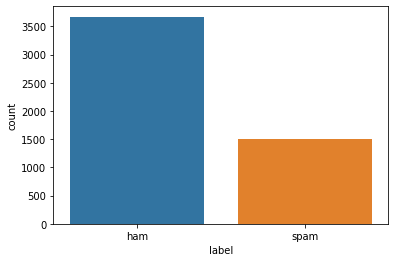

In [ ]:

sns.countplot(x="label", data=data)

In [ ]:
data['text'][1]

'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls'

In [ ]:
#data preprocessing
import warnings
warnings.filterwarnings("ignore")
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#loading_the_stop_words_from_nltk_library
stop_words = set(stopwords.words('english'))




def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
        
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
                df[column][index] = string
                total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
                
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

for index, row in data.iterrows():
    if type(row['text']) is str:
        txt_preprocessing(row['text'], index, 'text', data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter 988291 follow not...,0
1,2349,ham,subject hpl nom january 9 2001 see attached fi...,0
2,3624,ham,subject neon retreat ho ho ho around wonderful...,0
3,4685,spam,subject photoshop windows office cheap main tr...,1
4,2030,ham,subject indian springs deal book teco pvr reve...,0


In [ ]:
preprocessed_data = pd.DataFrame({'text':data['text'], 'Spam/Ham':data['label_num']})
preprocessed_data.head()

,text,Spam/Ham
0,subject enron methanol meter 988291 follow not...,0
1,subject hpl nom january 9 2001 see attached fi...,0
2,subject neon retreat ho ho ho around wonderful...,0
3,subject photoshop windows office cheap main tr...,1
4,subject indian springs deal book teco pvr reve...,0


In [ ]:
X = preprocessed_data

In [ ]:
#Split the mails and results
X = pd.DataFrame({'text':preprocessed_data['text']})
y = pd.DataFrame({'Spam/Ham':preprocessed_data['Spam/Ham']})
X


,text
0,subject enron methanol meter 988291 follow not...
1,subject hpl nom january 9 2001 see attached fi...
2,subject neon retreat ho ho ho around wonderful...
3,subject photoshop windows office cheap main tr...
4,subject indian springs deal book teco pvr reve...
...,...
5166,subject put 10 ft transport volumes decreased ...
5167,subject 3 4 2000 following noms hpl take extra...
5168,subject calpine daily gas nomination julie men...
5169,subject industrial worksheets august 2000 acti...


In [ ]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(3464, 1)

In [ ]:
X_test.shape

(1707, 1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
count_vectorizer=CountVectorizer(stop_words="english")
count_train=count_vectorizer.fit_transform(X_train.values.ravel())
count_test=count_vectorizer.transform(X_test.values.ravel())
count_train

<3464x40535 sparse matrix of type '<class 'numpy.int64'>'
	with 227645 stored elements in Compressed Sparse Row format>

In [ ]:
#Fit model with nive
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
import glob

model_NP=MultinomialNB()
model_NP.fit(count_train ,y_train)

MultinomialNB()

In [ ]:
#cal Accurcy Test
pred=model_NP.predict(count_test)
#print(pred)
#print(y_test.values)
acc=metrics.accuracy_score(y_test ,pred)
print("Accurcy=",acc*100)

Accurcy= 97.71528998242532


[[ 446   15]
 [  24 1222]]
recall= 0.9620689655172414


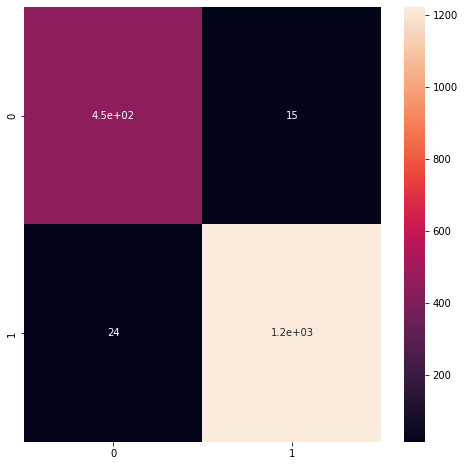

In [ ]:
#draw convutional matrix
cm=metrics.confusion_matrix(y_test ,pred ,labels=[1,0] )
print(cm)
r=279/290
print("recall=" ,r)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(count_train ,y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [ ]:
#cal Accurcy Test
pred=clf.predict(count_test)
#print(pred)
#print(y_test.values)
acc=metrics.accuracy_score(y_test ,pred)
print("Accurcy=",acc*100)

Accurcy= 89.74809607498536
